In [2]:
import pandas as pd
import numpy as np

training = pd.read_csv('dataset/train.csv')
testing = pd.read_csv('dataset/test.csv')

training.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


got to know that excat case of saleprice is what so helps in train and test split

In [3]:
testing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(training.drop('SalePrice', axis=1), training['SalePrice'], test_size=0.2, random_state=42)

In [5]:
# number of rows and columns
print(f"Training set shape: rows = {x_train.shape[0]}, columns = {x_train.shape[1]}")
print(f"Testing set shape: rows = {x_test.shape[0]}, columns = {x_test.shape[1]}")

Training set shape: rows = 1168, columns = 80
Testing set shape: rows = 292, columns = 80


In [6]:
# now this is interesting, here we need to find number of numerical and categorical column
# what i can think of is encoding is done only on categorical columns so i will do the encoding, whichever has that 
# possible it means it is categorical else it is numerical
from sklearn.preprocessing import OneHotEncoder

categorical, numerical = 0, 0
le = OneHotEncoder()

for col in training.columns:
    try:
        le.fit(training[col])
        categorical += 1
    except Exception:
        numerical += 1

print(f"Number of categorical columns: {categorical}")
print(f"Number of numerical columns: {numerical}")

Number of categorical columns: 0
Number of numerical columns: 81


so this method didn't work as it doesn't throw and "error" type of exception

In [7]:
from sklearn.preprocessing import OrdinalEncoder

categorical, numerical = 0, 0
oe = OrdinalEncoder()

for col in training.columns:
    if training[col].dtype == 'object' or str(training[col].dtype).startswith('category'):
        categorical += 1
    else:
        numerical += 1

print(f"Number of categorical columns: {categorical}")
print(f"Number of numerical columns: {numerical}")

Number of categorical columns: 43
Number of numerical columns: 38


it has equal kinda split of both types of columns


In [8]:
# Check data types of all columns
for type in training.dtypes.unique():
    print(f"Data type: {type}")

Data type: int64
Data type: object
Data type: float64


there are no abnormal data types

<Axes: xlabel='SalePrice', ylabel='Count'>

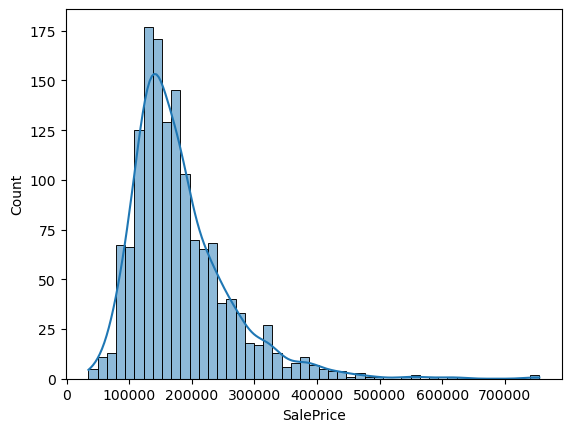

In [9]:
import seaborn as sns

#(LotArea, GrLivArea, SalePrice, YearBuilt, OverallQual).
sns.histplot(training['SalePrice'], kde=True)


<Axes: xlabel='LotArea', ylabel='Count'>

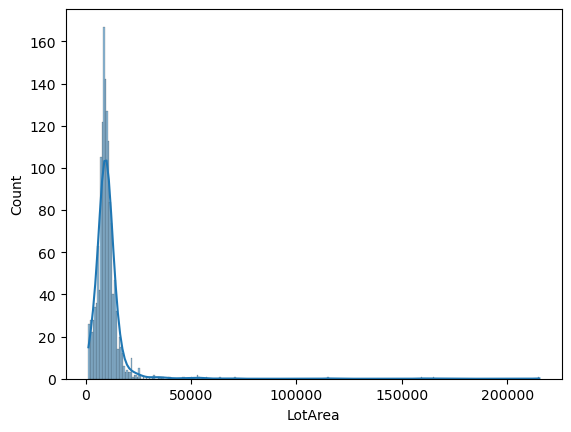

In [10]:
sns.histplot(training['LotArea'], kde=True)


<Axes: xlabel='GrLivArea', ylabel='Count'>

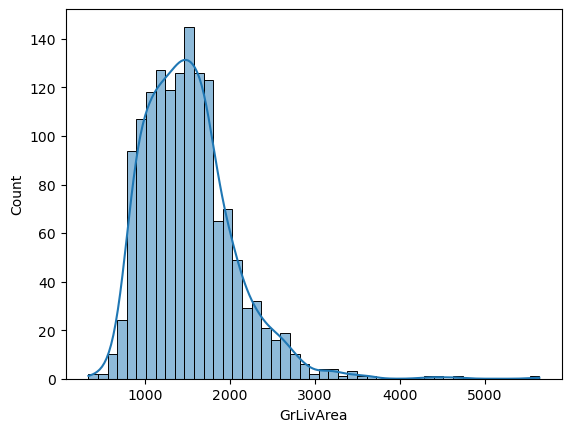

In [11]:
sns.histplot(training['GrLivArea'], kde=True)


<Axes: xlabel='OverallQual', ylabel='Count'>

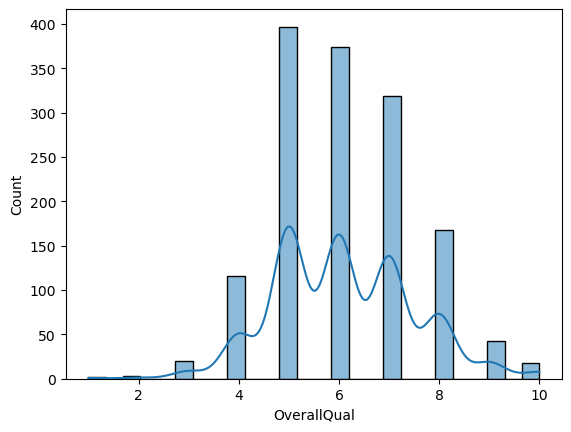

In [12]:
sns.histplot(training['OverallQual'], kde=True)

<Axes: xlabel='YearBuilt', ylabel='Count'>

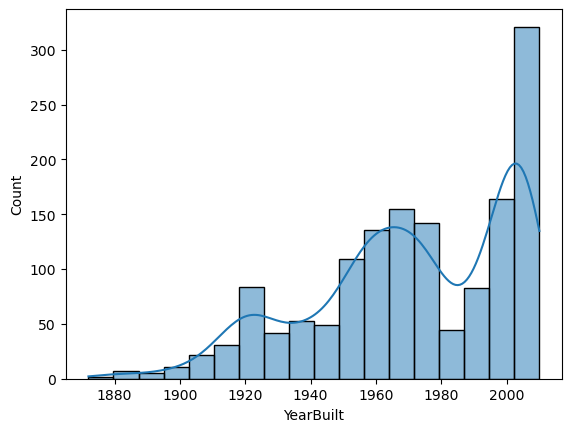

In [13]:
sns.histplot(training['YearBuilt'], kde=True)


only overallQual is not skewed, all others are skewed
GrLivArea and LotArea are controllably skewed, we can apply log transform
need to see for other 2

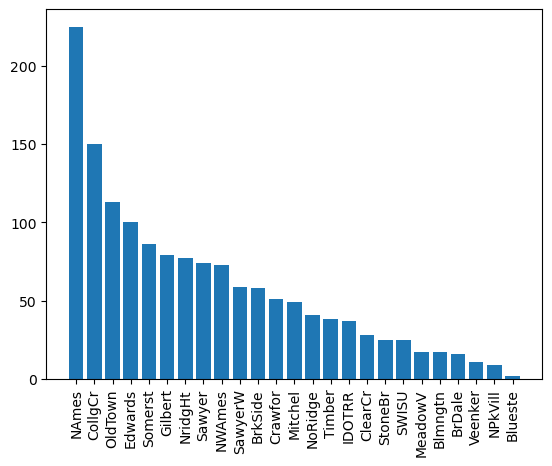

In [14]:
import matplotlib.pyplot as plt
# (Neighborhood, HouseStyle, BldgType)

plt.bar(training['Neighborhood'].value_counts().index, training['Neighborhood'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

<BarContainer object of 8 artists>

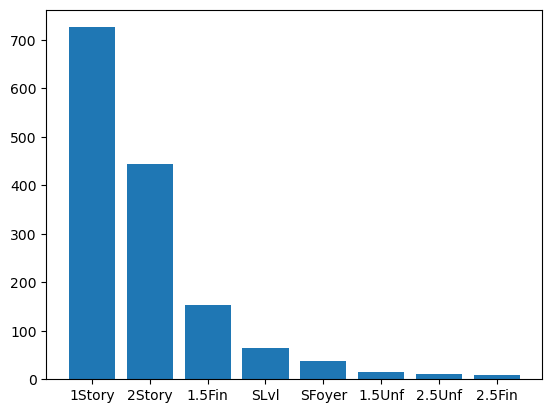

In [15]:
plt.bar(training['HouseStyle'].value_counts().index, training['HouseStyle'].value_counts().values)

<BarContainer object of 5 artists>

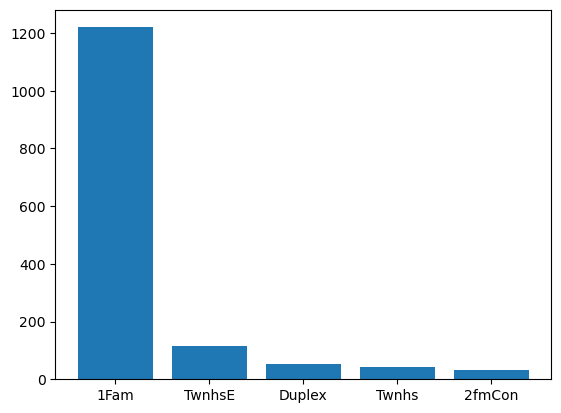

In [16]:
plt.bar(training['BldgType'].value_counts().index, training['BldgType'].value_counts().values)

names, 1story and 1fam are frequent quantities and bluest, 2.5fin, 2fmcon are rare

In [17]:
categorical_cols = training.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"for '{col}':")
    print(training[col].value_counts().head(10))
    print()

for 'MSZoning':
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

for 'Street':
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

for 'Alley':
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

for 'LotShape':
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

for 'LandContour':
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

for 'Utilities':
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

for 'LotConfig':
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

for 'LandSlope':
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

for 'Neighborhood':
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
Name: count, dtype: int64

for 'C

nothing to infer as such, just saw that yes this category has this much frequency

In [18]:
# as it is not clearly defined what is the domination criteria, i will consider 80% threshould
for col in categorical_cols:
    value_counts = training[col].value_counts(normalize=True)
    top_category = value_counts.index[0]
    top_freq = value_counts.iloc[0] # as pandas series che aa
    if top_freq > 0.8:
        print(f"'{col}' is dominated by '{top_category}' with frequency {top_freq:.2%}")

'Street' is dominated by 'Pave' with frequency 99.59%
'LandContour' is dominated by 'Lvl' with frequency 89.79%
'Utilities' is dominated by 'AllPub' with frequency 99.93%
'LandSlope' is dominated by 'Gtl' with frequency 94.66%
'Condition1' is dominated by 'Norm' with frequency 86.30%
'Condition2' is dominated by 'Norm' with frequency 98.97%
'BldgType' is dominated by '1Fam' with frequency 83.56%
'RoofMatl' is dominated by 'CompShg' with frequency 98.22%
'ExterCond' is dominated by 'TA' with frequency 87.81%
'BsmtCond' is dominated by 'TA' with frequency 92.13%
'BsmtFinType2' is dominated by 'Unf' with frequency 88.33%
'Heating' is dominated by 'GasA' with frequency 97.81%
'CentralAir' is dominated by 'Y' with frequency 93.49%
'Electrical' is dominated by 'SBrkr' with frequency 91.43%
'Functional' is dominated by 'Typ' with frequency 93.15%
'GarageQual' is dominated by 'TA' with frequency 95.07%
'GarageCond' is dominated by 'TA' with frequency 96.16%
'PavedDrive' is dominated by 'Y' wit

so i can observe that there are good number of rows which have clear dominance of 1 value and in that if we are imputing then we may use mode as mode of imputation for handling null or nan values

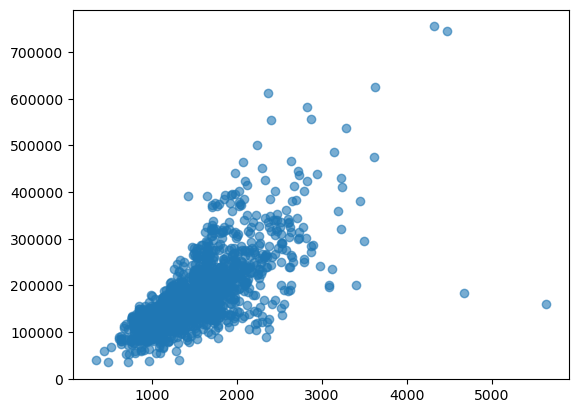

Correlation between GrLivArea and SalePrice: 0.709


In [19]:
plt.scatter(training['GrLivArea'], training['SalePrice'], alpha=0.6)
plt.show()

correlation = training['GrLivArea'].corr(training['SalePrice'])
print(f"Correlation between GrLivArea and SalePrice: {correlation:.3f}")

this shows me that both are highly correlated and +ve correlation so they depend on one other and are directly proportional to each other

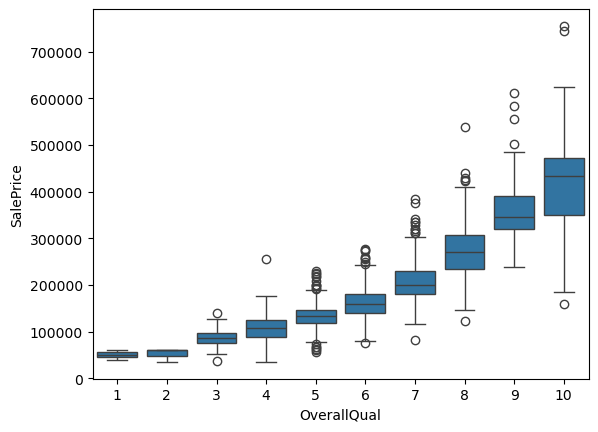

In [21]:
sns.boxplot(data=training, x='OverallQual', y='SalePrice')
plt.show()

this shows me that for overallQual value = 9 i will get many outliers and IQR range's value is increasing gradually, which is normal as Higher quality ratings should show higher median prices and different distributions.

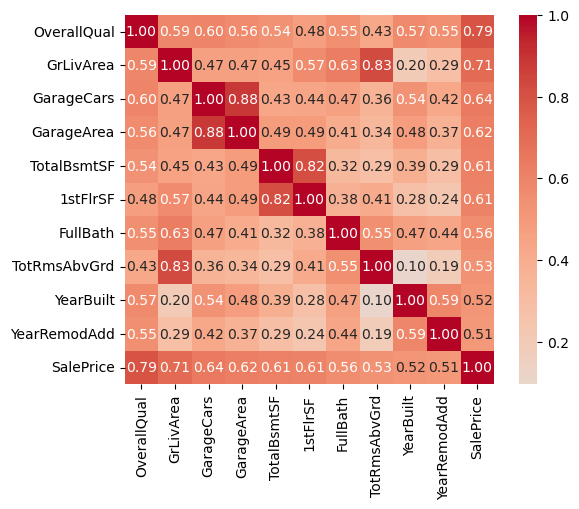

1. OverallQual: 0.791
2. GrLivArea: 0.709
3. GarageCars: 0.640
4. GarageArea: 0.623
5. TotalBsmtSF: 0.614
6. 1stFlrSF: 0.606
7. FullBath: 0.561
8. TotRmsAbvGrd: 0.534
9. YearBuilt: 0.523
10. YearRemodAdd: 0.507


In [22]:
numerical_cols = training.select_dtypes(include=[np.number]).columns
correlations = training[numerical_cols].corr()['SalePrice'].abs().sort_values(ascending=False)
top_10_features = correlations.head(11).index.tolist()  
top_10_features.remove('SalePrice')  
top_10_features = top_10_features[:10]  

features_to_plot = top_10_features + ['SalePrice']
corr_matrix = training[features_to_plot].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.show()

for i, feature in enumerate(top_10_features, 1):
    print(f"{i}. {feature}: {correlations[feature]:.3f}")

i think the feature overallQual is highly depending on our saleprice column and more than 50% correlation of 10 columns show that if we have less resources and want less columns + good result, we should select these 10

NAmes: Mean = $145,847, Std = $33,075, Count = 225
Blueste: Mean = $137,500, Std = $19,092, Count = 2
Difference in means: $8,347


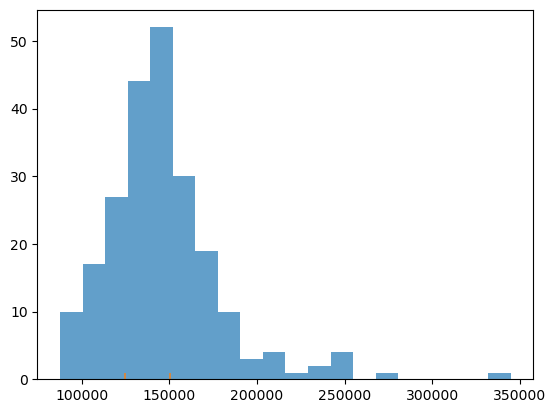

In [23]:
neighborhood_counts = training['Neighborhood'].value_counts()
neighborhood1 = neighborhood_counts.index[0] 
neighborhood2 = neighborhood_counts.index[-1]  

nb1_data = training[training['Neighborhood'] == neighborhood1]['SalePrice']
nb2_data = training[training['Neighborhood'] == neighborhood2]['SalePrice']

nb1_mean = nb1_data.mean()
nb2_mean = nb2_data.mean()
nb1_std = nb1_data.std()
nb2_std = nb2_data.std()

print(f"{neighborhood1}: Mean = ${nb1_mean:,.0f}, Std = ${nb1_std:,.0f}, Count = {len(nb1_data)}")
print(f"{neighborhood2}: Mean = ${nb2_mean:,.0f}, Std = ${nb2_std:,.0f}, Count = {len(nb2_data)}")
print(f"Difference in means: ${abs(nb1_mean - nb2_mean):,.0f}")

plt.hist(nb1_data, alpha=0.7, label=f'{neighborhood1} (Mean: ${nb1_mean:,.0f})', bins=20)
plt.hist(nb2_data, alpha=0.7, label=f'{neighborhood2} (Mean: ${nb2_mean:,.0f})', bins=20)
plt.show()

this is just like life, here i can see that mean difference in most frequent and least frequent neighbourhood is very much high, it was expected but

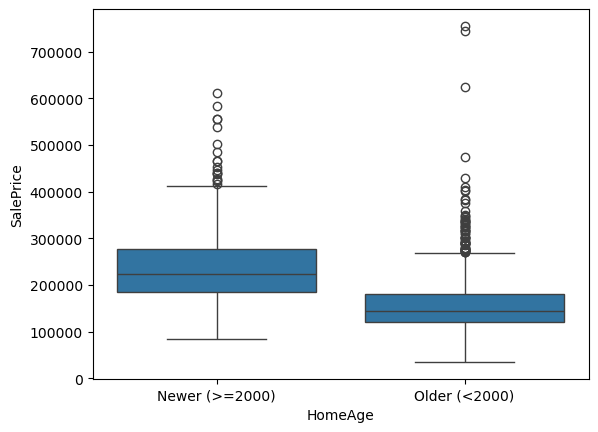

Newer Homes (>=2000): Mean = $242,439, Count = 388
Older Homes (<2000): Mean = $158,655, Count = 1072


In [24]:
# create training homeage without using lambda function
training['HomeAge'] = 'Older (<2000)'
training.loc[training['YearBuilt'] >= 2000, 'HomeAge'] = 'Newer (>=2000)'

sns.boxplot(data=training, x='HomeAge', y='SalePrice')
plt.show()

newer_homes = training[training['YearBuilt'] >= 2000]['SalePrice']
older_homes = training[training['YearBuilt'] < 2000]['SalePrice']

print(f"Newer Homes (>=2000): Mean = ${newer_homes.mean():,.0f}, Count = {len(newer_homes)}")
print(f"Older Homes (<2000): Mean = ${older_homes.mean():,.0f}, Count = {len(older_homes)}")

shows that newer homes have predictable pricing but not old ones
like some might be legacy so sold high, some might be not in good condition


In [25]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(newer_homes, older_homes)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {len(newer_homes) + len(older_homes) - 2}")

alpha = 0.05
if p_value < alpha:
    print(f"Result: Significant difference (p < {alpha})")
    print("We reject the null hypothesis - there IS a significant difference in mean prices")
else:
    print(f"Result: No significant difference (p >= {alpha})")
    print("We fail to reject the null hypothesis - there is NO significant difference in mean prices")

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(newer_homes)-1)*newer_homes.var() + (len(older_homes)-1)*older_homes.var()) / 
                     (len(newer_homes) + len(older_homes) - 2))
cohens_d = (newer_homes.mean() - older_homes.mean()) / pooled_std
print(f"Effect size (Cohen's d): {cohens_d:.3f}")

T-statistic: 20.112
P-value: 0.000000
Degrees of freedom: 1458
Result: Significant difference (p < 0.05)
We reject the null hypothesis - there IS a significant difference in mean prices
Effect size (Cohen's d): 1.192


t-test is used to determine whether the means of two groups are significantly different from each other, assuming the data is roughly normally distributed. In this case, the t-statistic of 20.112 indicates a very large difference relative to the variability in the data, and the p-value of practically zero (<0.05) means this difference is extremely unlikely to be due to chance, so we reject the null hypothesis of equal means. The degrees of freedom (1458) relate to the sample size and help determine the shape of the t-distribution for the test. The effect size (Cohen’s d) of 1.192 is considered very large, meaning the difference in mean prices is not just statistically significant but also practically substantial.

practically the average value in one group is over 1.19 standard deviations higher/lower than the other


In [29]:
missing_values = training.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

numerical_missing, categorical_missing = 0, 0
for col in missing_values.index:
    print(f"{col}: {missing_values[col]} ({missing_values[col]/len(training)*100:.2f}%)")
    if col in numerical_cols:
        numerical_missing += missing_values[col]
    else:
        categorical_missing += missing_values[col]

for i, col in enumerate(missing_values.head(5).index, 1):
    print(f"{i}. {col}: {missing_values[col]} missing values ({missing_values[col]/len(training)*100:.2f}%)")

PoolQC: 1453 (99.52%)
MiscFeature: 1406 (96.30%)
Alley: 1369 (93.77%)
Fence: 1179 (80.75%)
MasVnrType: 872 (59.73%)
FireplaceQu: 690 (47.26%)
GarageType: 81 (5.55%)
GarageFinish: 81 (5.55%)
GarageQual: 81 (5.55%)
GarageCond: 81 (5.55%)
BsmtExposure: 38 (2.60%)
BsmtFinType2: 38 (2.60%)
BsmtQual: 37 (2.53%)
BsmtCond: 37 (2.53%)
BsmtFinType1: 37 (2.53%)
Electrical: 1 (0.07%)
1. PoolQC: 1453 missing values (99.52%)
2. MiscFeature: 1406 missing values (96.30%)
3. Alley: 1369 missing values (93.77%)
4. Fence: 1179 missing values (80.75%)
5. MasVnrType: 872 missing values (59.73%)


i think poolQC has too many missing values, generally if there are more than 50% missing values then i try to delete that column entirely unless it is very impactful according to domain knowledge and this is not the case here

In [ ]:
print(numerical_missing)
for col in numerical_cols:
    median_value = training[col].median()
    if training[col].isnull().sum() > 0:   
        training[col].fillna(median_value, inplace=True)
        print(f"{col}: filled {training[col].isnull().sum()} values with median {median_value:.2f}")

0

Remaining missing values in numerical columns: 0


nothing to impute as no numerical one has missing values

In [31]:
categorical_cols = training.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if training[col].isnull().sum() > 0:
        missing_count = training[col].isnull().sum()
        missing_pct = missing_count / len(training) * 100
        
        if missing_pct > 50:
            training[col].fillna("Missing", inplace=True)
            print(f"{col}: filled {missing_count} values with 'Missing' ({missing_pct:.1f}% missing)")
        else:
            mode_value = training[col].mode()[0]
            training[col].fillna(mode_value, inplace=True)
            print(f"{col}: filled {missing_count} values with mode '{mode_value}' ({missing_pct:.1f}% missing)")

Alley: filled 1369 values with 'Missing' (93.8% missing)
MasVnrType: filled 872 values with 'Missing' (59.7% missing)
BsmtQual: filled 37 values with mode 'TA' (2.5% missing)
BsmtCond: filled 37 values with mode 'TA' (2.5% missing)
BsmtExposure: filled 38 values with mode 'No' (2.6% missing)
BsmtFinType1: filled 37 values with mode 'Unf' (2.5% missing)
BsmtFinType2: filled 38 values with mode 'Unf' (2.6% missing)
Electrical: filled 1 values with mode 'SBrkr' (0.1% missing)
FireplaceQu: filled 690 values with mode 'Gd' (47.3% missing)
GarageType: filled 81 values with mode 'Attchd' (5.5% missing)
GarageFinish: filled 81 values with mode 'Unf' (5.5% missing)
GarageQual: filled 81 values with mode 'TA' (5.5% missing)
GarageCond: filled 81 values with mode 'TA' (5.5% missing)
PoolQC: filled 1453 values with 'Missing' (99.5% missing)
Fence: filled 1179 values with 'Missing' (80.8% missing)
MiscFeature: filled 1406 values with 'Missing' (96.3% missing)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_82660\4056816716.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training[col].fillna("Missing", inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_82660\4056816716.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

yes heard that using Missing as a value works well when there are too many missing values as artificial inflation is kinda bad

In [37]:
training_original = pd.read_csv('dataset/train.csv')

print(f"Original missing values in LotFrontage: {training_original['LotFrontage'].isnull().sum()}")

neighborhood_medians = training_original.groupby('Neighborhood')['LotFrontage'].median()

# map each neighborhood's median to its rows
median_map = training_original['Neighborhood'].map(neighborhood_medians)

training['LotFrontage'] = training_original['LotFrontage'].fillna(median_map)

print(f"Missing values in LotFrontage after neighborhood-based imputation: {training['LotFrontage'].isnull().sum()}")

print("\nSample of median LotFrontage by Neighborhood:")
for neighborhood in neighborhood_medians.head(5).index:
    median_val = neighborhood_medians[neighborhood]
    count = (training_original['Neighborhood'] == neighborhood).sum()
    missing_count = ((training_original['Neighborhood'] == neighborhood) & 
                     (training_original['LotFrontage'].isnull())).sum()
    print(f"{neighborhood}: {median_val:.1f} ft (used for {missing_count}/{count} houses)")


Original missing values in LotFrontage: 259
Missing values in LotFrontage after neighborhood-based imputation: 0

Sample of median LotFrontage by Neighborhood:
Blmngtn: 43.0 ft (used for 3/17 houses)
Blueste: 24.0 ft (used for 0/2 houses)
BrDale: 21.0 ft (used for 0/16 houses)
BrkSide: 52.0 ft (used for 7/58 houses)
ClearCr: 80.0 ft (used for 15/28 houses)


we recognise that lot frontage is highly dependent on neighborhood characteristics like zoning, development patterns, and lot subdivision practices. By using neighborhood-specific medians, we:

1. **Preserve local patterns**: Each neighborhood has typical lot sizes and frontage measurements
2. **Improve accuracy**: More realistic imputation than global median
3. **Maintain relationships**: Preserves the correlation between neighborhood and lot characteristics

This method is particularly valuable for geographical/spatial features where location context matters significantly for missing value estimation.

In [ ]:
total_missing = training.isnull().sum().sum()
print(f"Total missing values in dataset after imputation: {total_missing}")

Total missing values in dataset after imputation: 0


finally imputation is complete

In [38]:
outlier_info = {}
for feature in ['LotArea', 'GrLivArea']:
    Q1 = training[feature].quantile(0.25)
    Q3 = training[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = training[(training[feature] < lower_bound) | (training[feature] > upper_bound)]
    outlier_info[feature] = {
        'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'lower_bound': lower_bound, 'upper_bound': upper_bound, 'count': outliers.shape[0]
    }
    print(f"{feature}: {outliers.shape[0]} outliers detected")


LotArea: 69 outliers detected
GrLivArea: 31 outliers detected


considering 1400 columns there are less outliers in these 

In [39]:
# winsorization = cap outliers using upper and lower bound
for feature in ['LotArea', 'GrLivArea']:
    lower = outlier_info[feature]['lower_bound']
    upper = outlier_info[feature]['upper_bound']
    before = training[feature].copy()
    training[feature] = np.where(training[feature] < lower, lower, training[feature])
    training[feature] = np.where(training[feature] > upper, upper, training[feature])
    print(f"{feature}: Outliers capped at [{lower:.2f}, {upper:.2f}]")

LotArea: Outliers capped at [1481.50, 17673.50]
GrLivArea: Outliers capped at [158.62, 2747.62]


good technique as the curve becomes more normal and less outliers so winsorization is good

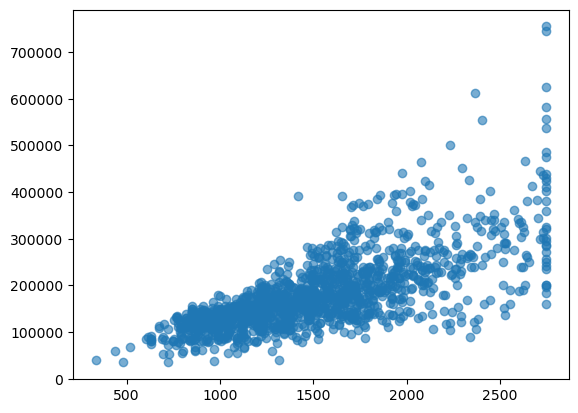

In [40]:
plt.scatter(training['GrLivArea'], training['SalePrice'], alpha=0.6)

scatter plot shows a clearer linear relationship between GrLivArea and SalePrice, with less distortion from extreme values

In [43]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(training[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=training.index)

training = pd.concat([training.drop(columns=categorical_cols), encoded_df], axis=1)


simple application of OHE, nothing else

In [44]:
from sklearn.preprocessing import StandardScaler

numerical_cols = training.select_dtypes(include=[np.number]).columns.drop('SalePrice')
scaler = StandardScaler()
training[numerical_cols] = scaler.fit_transform(training[numerical_cols])

standardization = all variables have mean 0 and standard deviation 1.

In [45]:
training.to_csv('house_prices_clean.csv', index=False)

just saved it

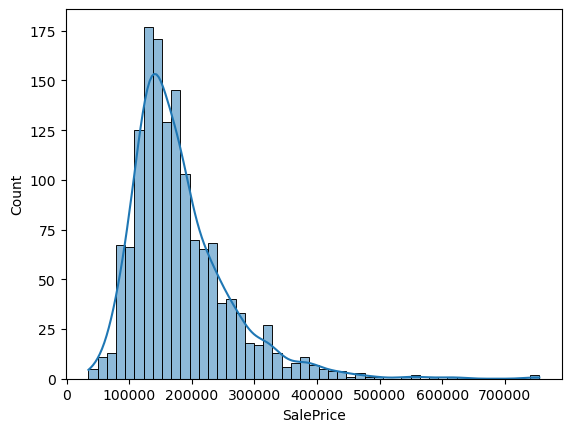

C:\Users\lenovo\AppData\Local\Temp\ipykernel_82660\3855998546.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  training['SalePrice_log'] = np.log1p(training['SalePrice'])


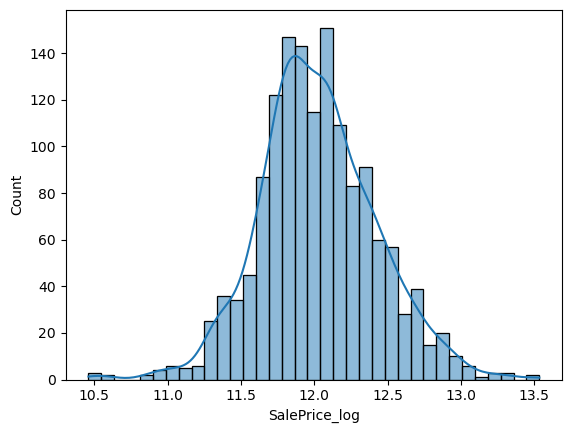

Skewness before log: 1.88
Skewness after log: 0.12


In [46]:
skew_before = training['SalePrice'].skew()
sns.histplot(training['SalePrice'], kde=True)
plt.show()

training['SalePrice_log'] = np.log1p(training['SalePrice'])
skew_after = training['SalePrice_log'].skew()
sns.histplot(training['SalePrice_log'], kde=True)
plt.show()

print(f"Skewness before log: {skew_before:.2f}")
print(f"Skewness after log: {skew_after:.2f}")

as i told while seeing the histplot of this column i told we need to use log transform and yes it worked well as data is normal now

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = training.drop(['SalePrice', 'SalePrice_log'], axis=1, errors='ignore')
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values('VIF', ascending=False).head(10))

high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
training = training.drop(columns=high_vif_features)
print(f"Removed {len(high_vif_features)} features with VIF > 10.")

c:\Users\lenovo\anaconda3\envs\ai-gpu\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 feature         VIF
10            BsmtFinSF2         inf
122   Exterior1st_CBlock         inf
12           TotalBsmtSF         inf
11             BsmtUnfSF         inf
136   Exterior2nd_CBlock         inf
9             BsmtFinSF1         inf
233  MiscFeature_Missing  954.941426
235     MiscFeature_Shed  798.433680
33              PoolArea  237.361850
228       PoolQC_Missing  205.275843
Removed 77 features with VIF > 10.


vif > 10 removed as linear models like linear regression won't work on them

seeing these values, this is a great dimensionality reduction without applying any particular method

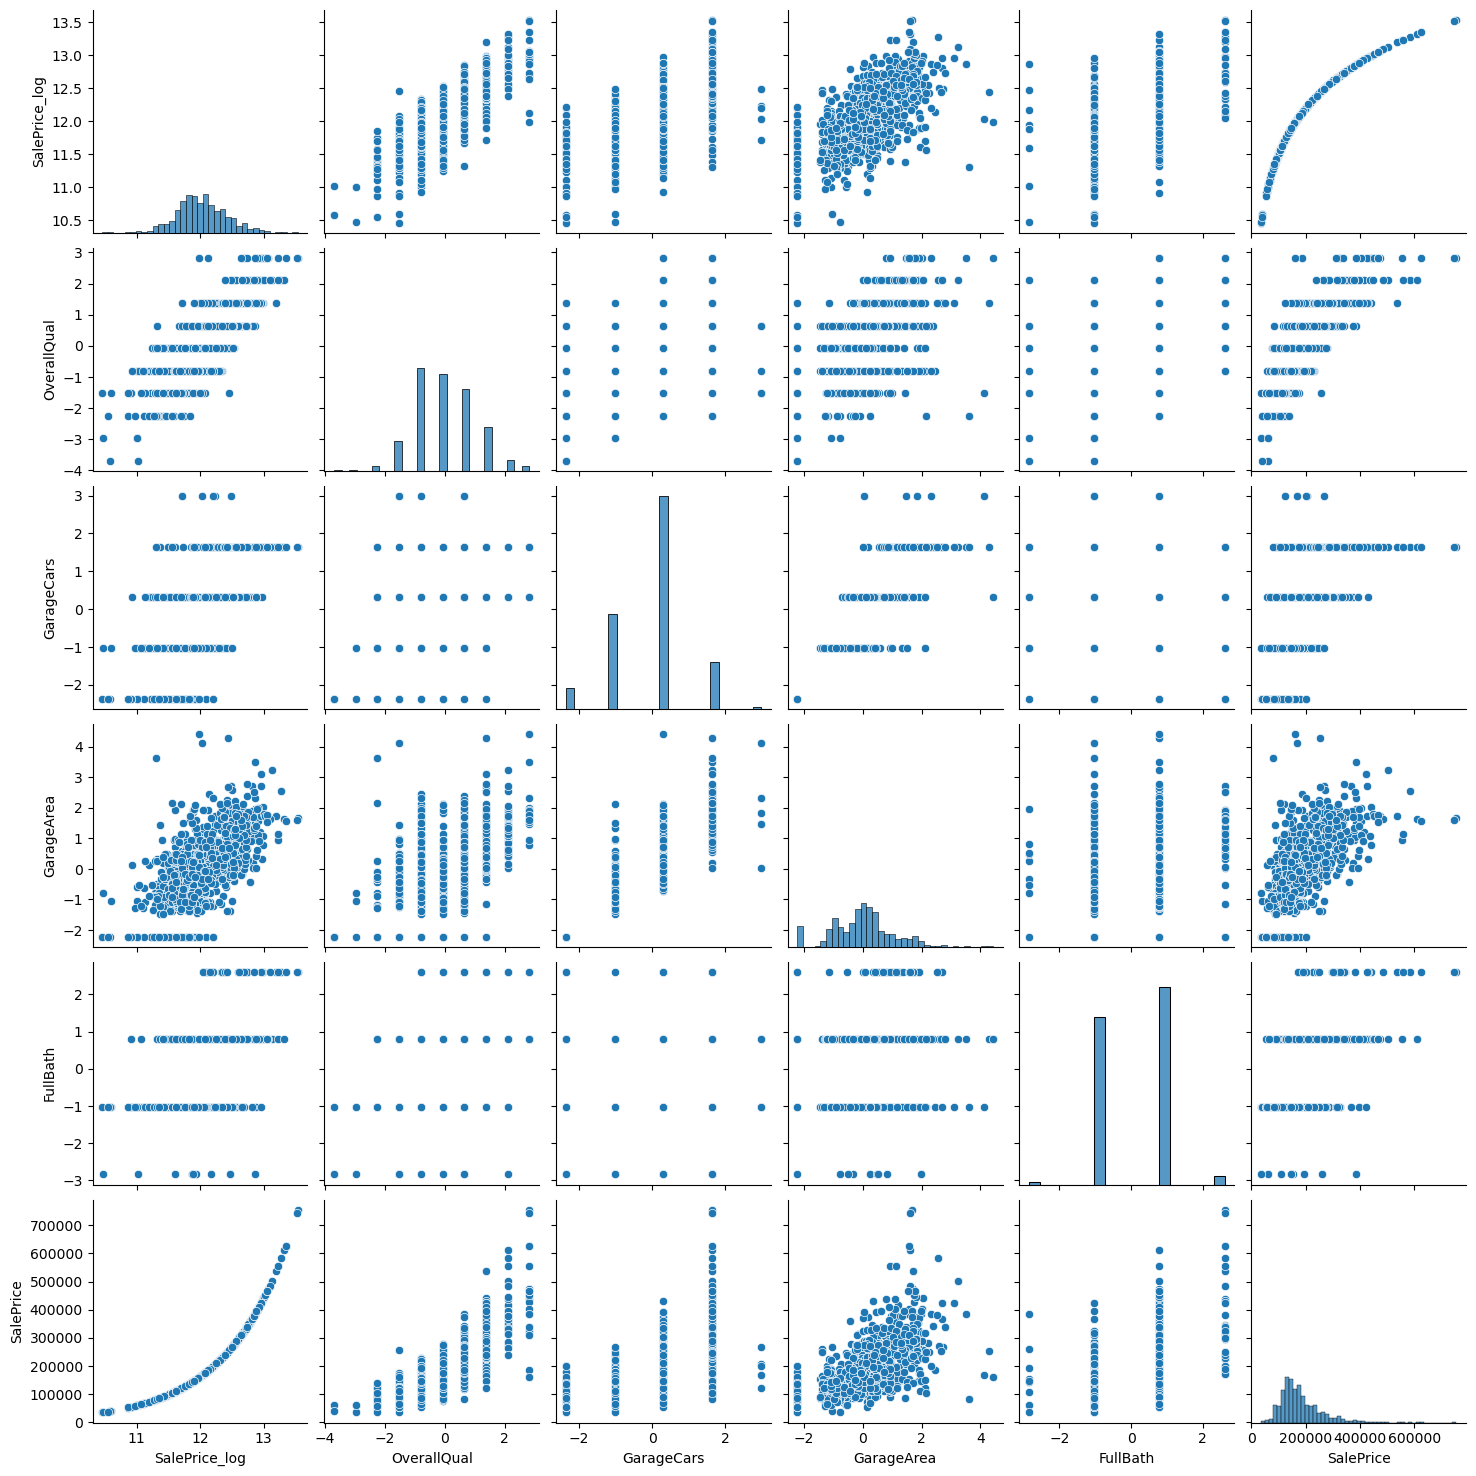

In [ ]:
corrs = training.corr()['SalePrice'].abs().sort_values(ascending=False)
top5 = corrs.index[1:6].tolist()  
sns.pairplot(training[top5 + ['SalePrice']])
plt.show()

discretes seem normal but i see linear relation between categforicals so i will atleast try linear regression on it

In [49]:
if 'OverallQual' in training.columns and 'GrLivArea' in training.columns:
    training['OverallQual_GrLivArea'] = training['OverallQual'] * training['GrLivArea']
    corr_interaction = training['OverallQual_GrLivArea'].corr(training['SalePrice'])
    print(f"Correlation of OverallQual * GrLivArea with SalePrice: {corr_interaction:.3f}")
else:
    print("OverallQual or GrLivArea not found in training data.")

OverallQual or GrLivArea not found in training data.


77 columns removed one of these feature so of no use


In [51]:
# this is extra, trying linear regression on it
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(training.drop('SalePrice', axis=1), training['SalePrice'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error: 21716028303532693872525772828180480.000
R^2 Score: -2831174022714274093203456.000


results are horrible

In [52]:
# this is extra, trying linear regression on it
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

training_ = pd.read_csv('house_prices_clean.csv')
x_train, x_test, y_train, y_test = train_test_split(training_.drop('SalePrice', axis=1), training_['SalePrice'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error: 231767879305762509922409692266496.000
R^2 Score: -30216169827118318878720.000


even more worse :(